<a href="https://colab.research.google.com/github/jthetzel/deep-learning-with-python/blob/master/chapter03_introduction_to_keras_and_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TensorFlow

In [1]:
import tensorflow as tf

x = tf.ones(shape=(2,1))
x

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[1.],
       [1.]], dtype=float32)>

In [2]:
x = tf.zeros(shape=(2,1))
x

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[0.],
       [0.]], dtype=float32)>

## Random tensors

In [5]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
x

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[-0.4846445 ],
       [-0.9491143 ],
       [-0.18164138]], dtype=float32)>

In [7]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
x

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.67817163],
       [0.50923216],
       [0.6705233 ]], dtype=float32)>

## Assignment

In [9]:
import numpy as np

x = np.ones((2, 2))
x[0, 0] = 0
x

array([[0., 1.],
       [1., 1.]])

In [10]:
v = tf.Variable(initial_value=tf.random.normal((3, 1)))
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.14139828],
       [-0.26362684],
       [ 0.55910474]], dtype=float32)>

In [11]:
v.assign(tf.ones((3, 1)))
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [12]:
v[0, 0].assign(3.)
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [13]:
v.assign_add(tf.ones((3, 1)))
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [14]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

e

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[4., 4.],
       [4., 4.]], dtype=float32)>

## Gradient tape

In [16]:
input_var = tf.Variable(initial_value=3.)

with tf.GradientTape() as tape:
  result = tf.square(input_var)

gradient = tape.gradient(result, input_var)
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [17]:
input_const = tf.constant(3.)

with tf.GradientTape() as tape:
  tape.watch(input_const)
  result = tf.square(input_const)

gradient = tape.gradient(result, input_const)
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [19]:
time = tf.Variable(0.)

with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9*time**2
  speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

print(speed)
print(acceleration)

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(9.8, shape=(), dtype=float32)


## Linear classifier

In [20]:
num_samples_per_class = 1_000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class,
)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)

In [21]:
negative_samples

array([[-1.06177427,  2.64949594],
       [-1.68390747,  3.28218996],
       [ 0.19288641,  1.48984348],
       ...,
       [-0.51861048,  2.99395152],
       [-0.54370062,  2.96853296],
       [-2.25063513,  2.16502722]])

In [22]:
positive_samples

array([[ 1.82863569, -1.59158191],
       [ 2.17897146,  0.07857169],
       [ 3.72980783,  1.68352766],
       ...,
       [ 4.10227304, -0.6384637 ],
       [ 1.48002646, -1.37154078],
       [ 3.93393393, -0.01034946]])

In [23]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
inputs

array([[-1.0617743 ,  2.6494958 ],
       [-1.6839075 ,  3.2821898 ],
       [ 0.19288641,  1.4898435 ],
       ...,
       [ 4.102273  , -0.6384637 ],
       [ 1.4800265 , -1.3715408 ],
       [ 3.933934  , -0.01034946]], dtype=float32)

In [25]:
inputs.shape

(2000, 2)

In [24]:
targets = np.vstack((
    np.zeros((num_samples_per_class, 1), dtype="float32"),
    np.ones((num_samples_per_class, 1), dtype="float32")
))
targets

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

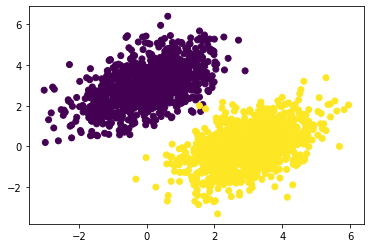

In [30]:
import matplotlib.pyplot as plt

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

## Linear classifier variables

In [32]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim))) 
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim, )))

## Forward pass function

In [33]:
def model(inputs):
  return tf.matmul(inputs, W) + b

## Mean squared loss

In [34]:
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

## Training step function

In [37]:
learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss

## Batch training loop

In [39]:
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step}: {loss:4f}")

Loss at step 0: 0.078629
Loss at step 1: 0.073465
Loss at step 2: 0.069160
Loss at step 3: 0.065277
Loss at step 4: 0.061736
Loss at step 5: 0.058503
Loss at step 6: 0.055551
Loss at step 7: 0.052856
Loss at step 8: 0.050395
Loss at step 9: 0.048147
Loss at step 10: 0.046095
Loss at step 11: 0.044222
Loss at step 12: 0.042511
Loss at step 13: 0.040949
Loss at step 14: 0.039522
Loss at step 15: 0.038220
Loss at step 16: 0.037030
Loss at step 17: 0.035944
Loss at step 18: 0.034953
Loss at step 19: 0.034047
Loss at step 20: 0.033221
Loss at step 21: 0.032466
Loss at step 22: 0.031776
Loss at step 23: 0.031147
Loss at step 24: 0.030572
Loss at step 25: 0.030048
Loss at step 26: 0.029568
Loss at step 27: 0.029131
Loss at step 28: 0.028731
Loss at step 29: 0.028367
Loss at step 30: 0.028033
Loss at step 31: 0.027729
Loss at step 32: 0.027452
Loss at step 33: 0.027198
Loss at step 34: 0.026966
Loss at step 35: 0.026755
Loss at step 36: 0.026562
Loss at step 37: 0.026386
Loss at step 38: 0.026

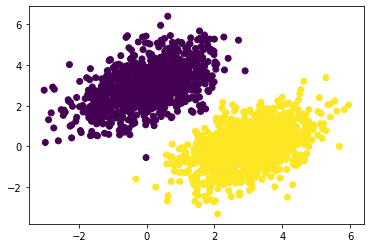

In [40]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

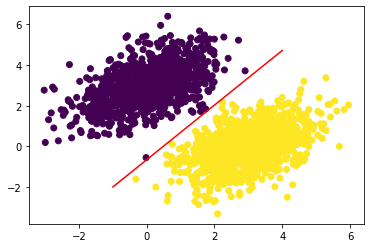

In [42]:
x = np.linspace(-1, 4, 100)
y = -W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## Keras core API

In [49]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):
  def __init__(self, units, activation=None):
    super().__init__()
    self.units = units
    self.activation = activation

  def build(self, input_shape):
    input_dim = input_shape[-1]
    self.W = self.add_weight(
        shape=(input_dim, self.units),
        initializer="random_normal",
    )
    self.b = self.add_weight(
        shape=(self.units, ),
        initializer="zeros",
    )

  def call(self, inputs):
    y = tf.matmul(inputs, self.W) + self.b
    if self.activation is not None:
      y = self.activation(y)
    return y

In [50]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


In [51]:
output_tensor

<tf.Tensor: shape=(2, 32), dtype=float32, numpy=
array([[0.78972644, 1.2998883 , 2.5137732 , 0.        , 0.        ,
        0.        , 1.6090902 , 2.2230911 , 0.        , 0.21335104,
        0.        , 0.        , 0.7805301 , 0.        , 1.2029741 ,
        0.        , 0.        , 1.0999581 , 1.3401698 , 0.0711031 ,
        0.4971331 , 0.7023634 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.2583846 , 1.5680048 ,
        0.23783839, 0.        ],
       [0.78972644, 1.2998883 , 2.5137732 , 0.        , 0.        ,
        0.        , 1.6090902 , 2.2230911 , 0.        , 0.21335104,
        0.        , 0.        , 0.7805301 , 0.        , 1.2029741 ,
        0.        , 0.        , 1.0999581 , 1.3401698 , 0.0711031 ,
        0.4971331 , 0.7023634 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.2583846 , 1.5680048 ,
        0.23783839, 0.        ]], dtype=float32)>

In [53]:
from tensorflow.keras import models
from tensorflow.keras import layers

layer = layers.Dense(32, activation="relu")
layer

In [55]:
model = models.Sequential([
  layers.Dense(32, activation="relu"),
  layers.Dense(32)
])
model

In [57]:
model = keras.Sequential([
  SimpleDense(32, activation="relu"),
  SimpleDense(64, activation="relu"),
  SimpleDense(32, activation="relu"),
  SimpleDense(19, activation="softmax")
])
model

## Compile step

In [58]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(
  optimizer="rmsprop",
  loss="mean_squared_error",
  metrics=["accuracy"]
)

In [59]:
model

## Fit() method

In [60]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128,
)

Epoch 1/5
16/16 [==============================] - 1s 2ms/step - loss: 4.9645 - accuracy: 0.1780
Epoch 2/5
16/16 [==============================] - 0s 2ms/step - loss: 4.7044 - accuracy: 0.1875
Epoch 3/5
16/16 [==============================] - 0s 2ms/step - loss: 4.4853 - accuracy: 0.1995
Epoch 4/5
16/16 [==============================] - 0s 2ms/step - loss: 4.2775 - accuracy: 0.2085
Epoch 5/5
16/16 [==============================] - 0s 2ms/step - loss: 4.0764 - accuracy: 0.2235


In [61]:
history.history

{'accuracy': [0.17800000309944153,
  0.1875,
  0.19949999451637268,
  0.2084999978542328,
  0.22349999845027924],
 'loss': [4.964537143707275,
  4.70438814163208,
  4.485321998596191,
  4.277478218078613,
  4.076448440551758]}

## Monitoring loss and metrics on validation data

In [64]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.BinaryAccuracy()]
)

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]

training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]

model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 1s 7ms/step - loss: 0.8764 - binary_accuracy: 0.8371 - val_loss: 0.1213 - val_binary_accuracy: 0.9983
Epoch 2/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0701 - binary_accuracy: 0.9657 - val_loss: 0.0297 - val_binary_accuracy: 1.0000
Epoch 3/5
88/88 [==============================] - 0s 4ms/step - loss: 0.0667 - binary_accuracy: 0.9657 - val_loss: 0.0540 - val_binary_accuracy: 0.9867
Epoch 4/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0712 - binary_accuracy: 0.9521 - val_loss: 0.0393 - val_binary_accuracy: 0.9933
Epoch 5/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0734 - binary_accuracy: 0.9564 - val_loss: 0.0266 - val_binary_accuracy: 0.9983


## Inference

In [65]:
predictions = model.predict(val_inputs, batch_size=128)
predictions[:10]

array([[-0.16932735],
       [ 0.2051808 ],
       [ 1.0323881 ],
       [-0.04770508],
       [ 0.7202194 ],
       [ 0.02455845],
       [-0.30974677],
       [ 0.34639117],
       [ 0.03131732],
       [ 0.88406014]], dtype=float32)

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)